# body performance 데이터 분석  
  
data shape : (13393, 12)  
  
age : 20 ~64  
gender : F,M  
height_cm : (If you want to convert to feet, divide by 30.48)   
weight_kg  
body fat_%  
diastolic : diastolic blood pressure (min)  
systolic : systolic blood pressure (min)  
gripForce  
sit and bend forward_cm  
sit-ups counts  
broad jump_cm  
class : A,B,C,D ( A: best) / stratified  

In [353]:
import pandas as pd

df = pd.read_csv('bodyperformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [354]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [355]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


< 머신 학습 데이터는 모두 float64 타입으로 변환 가능해야 하므로 문자열을 숫자형으로 변환 >  
  
- gender 피처가 M, F 와 같이 문자로 되어있으므로 원핫 인코딩 변환 

In [356]:
df = pd.get_dummies(df, columns=["gender"])
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_F,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,1,0


In [357]:
df.drop('gender_F', axis=1, inplace=True)
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


< 레이블 인코딩 >

In [358]:
from sklearn.preprocessing import LabelEncoder
# 변환기의 한 종류로 레이블을 숫자로 변환
encoder = LabelEncoder()
encoder.fit(df['class']) # y_data를 변환기에 설정
df['class'] = encoder.transform(df['class']) # 변환
df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,3,0


In [339]:
encoder.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

In [359]:
x_data = df.drop('class', axis=1)
x_data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,0


< 값 분포 및 이상치 분석 >  
  
IQR(InterQuartile Range, 사분범위)  
데이터 분포 현황을 박스(구역으)로 나눠서 분석  
사분위는 데이터 분포가 높은 순으로 정리하고 1/4씩 나눈것  
Q1: 25%(1/4지점)  
Q2: 50%(2/4지점)  
Q3: 75%(3/4지점)  
Q4: 100%(4/4지점)  
  
이 중 IQR은 Q1 - Q3구역이고, 이를 통해 이상치 구역을 정한다.  
이상치는 아래 최대값보다 크거나 최소값 보다 작은 값들을 말한다.  
  
최소값: Q1 - IQR * 1.5   
최대값: Q3 + IQR * 1.5
  

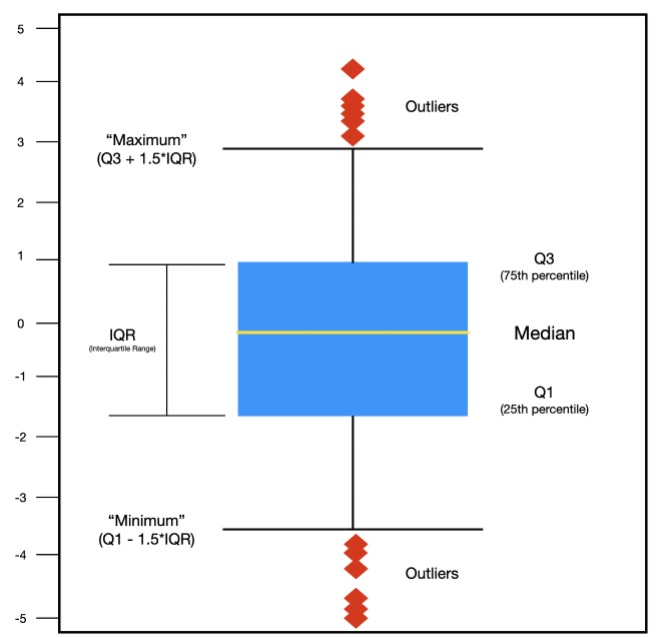

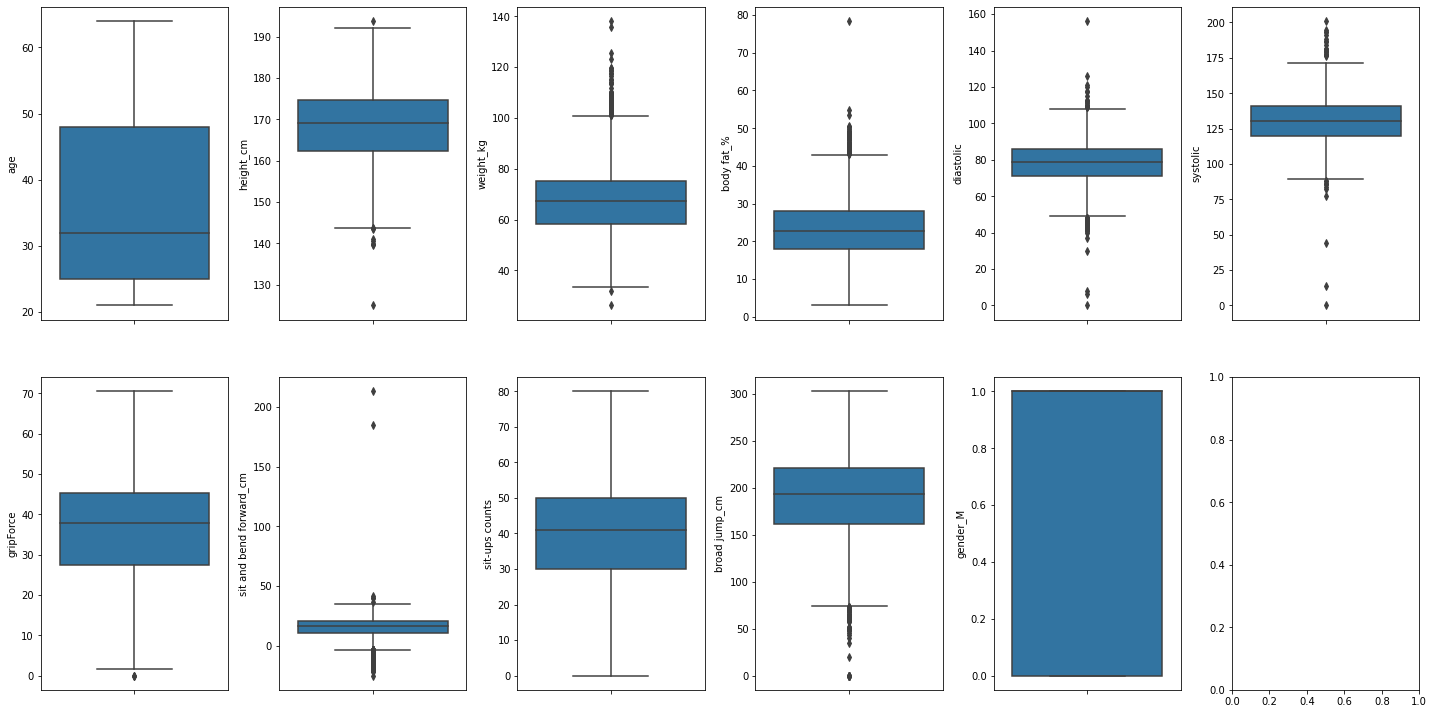

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
inx = 0
axs = axs.flatten()
for k, v in x_data.items():
    sns.boxplot(y=k, data=x_data, ax=axs[inx])
    inx+=1
    
plt.tight_layout(pad=1, w_pad=1, h_pad=5.0)

In [360]:
q1 = x_data.quantile(0.25) 
q1

age                         25.0
height_cm                  162.4
weight_kg                   58.2
body fat_%                  18.0
diastolic                   71.0
systolic                   120.0
gripForce                   27.5
sit and bend forward_cm     10.9
sit-ups counts              30.0
broad jump_cm              162.0
gender_M                     0.0
Name: 0.25, dtype: float64

In [361]:
q2 = x_data.quantile(0.5) 
q2

age                         32.0
height_cm                  169.2
weight_kg                   67.4
body fat_%                  22.8
diastolic                   79.0
systolic                   130.0
gripForce                   37.9
sit and bend forward_cm     16.2
sit-ups counts              41.0
broad jump_cm              193.0
gender_M                     1.0
Name: 0.5, dtype: float64

In [363]:
q3 = x_data.quantile(0.75) 
q3

age                         48.0
height_cm                  174.8
weight_kg                   75.3
body fat_%                  28.0
diastolic                   86.0
systolic                   141.0
gripForce                   45.2
sit and bend forward_cm     20.7
sit-ups counts              50.0
broad jump_cm              221.0
gender_M                     1.0
Name: 0.75, dtype: float64

In [364]:
import numpy as np

iqr = q3 - q1 
minimum = q1 - (iqr * 1.5) 
maximum = q3 + (iqr * 1.5) 



In [365]:
minimum

age                         -9.50
height_cm                  143.80
weight_kg                   32.55
body fat_%                   3.00
diastolic                   48.50
systolic                    88.50
gripForce                    0.95
sit and bend forward_cm     -3.80
sit-ups counts               0.00
broad jump_cm               73.50
gender_M                    -1.50
dtype: float64

In [367]:
import warnings
warnings.simplefilter(action='ignore')

x2_data = x_data

for key in x2_data:
    x2_data[key][x2_data[key]<minimum[key]]=minimum[key]
    x2_data[key][x2_data[key]>maximum[key]]=maximum[key]

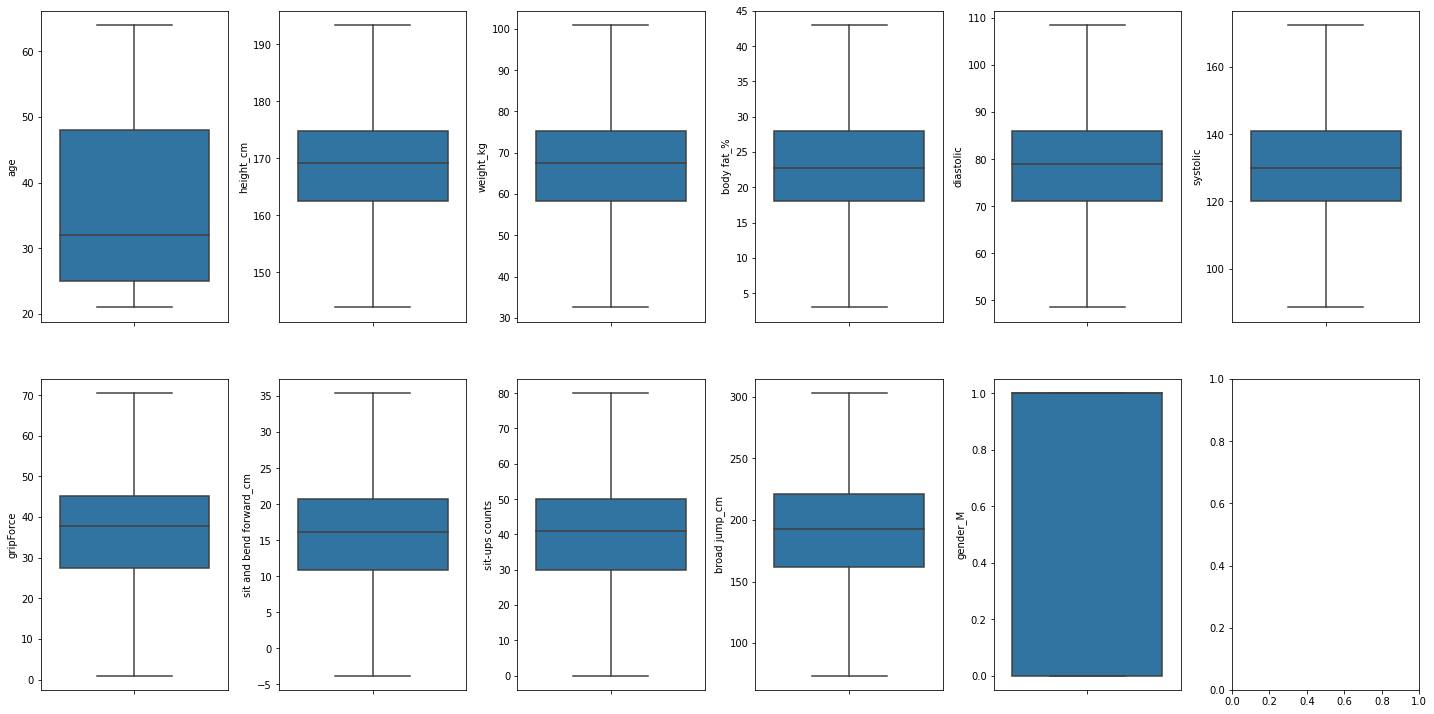

In [293]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
inx = 0
axs = axs.flatten()
for k, v in x2_data.items():
    sns.boxplot(y=k, data=x2_data, ax=axs[inx])
    inx+=1
    
plt.tight_layout(pad=1, w_pad=1, h_pad=5.0)

< 피처들간 상관관계 분석 >

<AxesSubplot:>

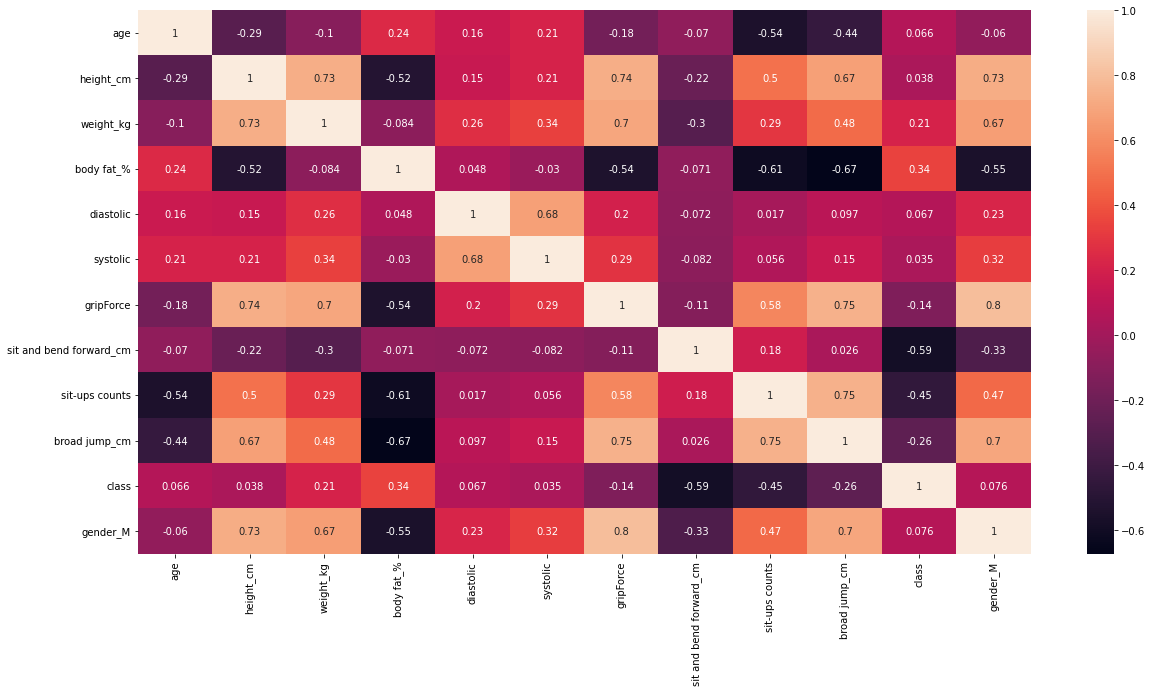

In [294]:
plt.figure(figsize=(20, 10))
#sns.heatmap(df.corr().abs(), annot=True)
sns.heatmap(df.corr(), annot=True)

< 피처들의 상관관계를 참고해서 피처를 선택 >  
- 오히려 데이터 손실로 성능 개선이 안되거나 나빠질 수 있음

In [295]:
# 큰 효과 없음. age	height_cm	weight_kg	body fat_%	diastolic	systolic	gripForce	sit and bend forward_cm	sit-ups counts	broad jump_cm	gender_M
x2_data.drop('gripForce', axis=1, inplace=True)
x2_data.drop('sit and bend forward_cm', axis=1, inplace=True)
x2_data.drop('sit-ups counts', axis=1, inplace=True)
x2_data.drop('broad jump_cm', axis=1, inplace=True)

In [347]:
x2_data = x2_data[['gripForce','height_cm','sit-ups counts','broad jump_cm', 'weight_kg']]

< 이상치 행을 삭제 하고 학습 >  
별 효과 없었음

In [241]:
res = df[(minimum < df) & (df < maximum)]
res.isnull().sum()

age                          0
height_cm                   11
weight_kg                   83
body fat_%                  85
diastolic                   54
systolic                    29
gripForce                    3
sit and bend forward_cm    409
sit-ups counts             126
broad jump_cm               57
class                        0
gender_M                     0
dtype: int64

In [242]:
res = res.dropna()
res

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13387,39.0,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,1,1
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,3,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,0,1


In [348]:
y_data = df[['class']]
y_data

,class
0,2
1,0
2,2
3,1
4,1
...,...
13388,2
13389,3
13390,0
13391,3


In [244]:
res.drop('class', axis=1, inplace=True)

In [245]:
res

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_M
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,1
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13387,39.0,174.4,70.80,24.3,78.0,132.0,41.6,12.0,44.0,168.0,1
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,1
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,1


< 학습 및 평가 >

In [368]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()


In [369]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 표준화 변환기 객체
scaler = StandardScaler()

scaled = scaler.fit_transform(x_data)

X_train, X_test, y_train, y_test = train_test_split(scaled, y_data, 
                                                    test_size=0.2, random_state=121)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [370]:
pred = dt.predict(X_test)
pred

array([1, 3, 0, ..., 3, 2, 0])

In [371]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred) # 채점. 
score

0.6513624486748787

In [372]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.6756
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.6887


In [373]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [374]:
pred = dt.predict(X_test)
pred

array([1, 3, 0, ..., 3, 2, 0])

In [375]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, pred) # 채점. 
score

0.6513624486748787

In [377]:
rf_clf = RandomForestClassifier(random_state=0)
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(rf_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7226
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7178


In [378]:
rf_clf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.7061
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.7178
